## Статистика по ППК

### Версия Python

In [1]:
!python -V

Python 3.12.6


### Импорт необходимых библиотек

In [2]:
# Подавление предупреждений
import warnings
for warn in [UserWarning, FutureWarning]: warnings.filterwarnings("ignore", category = warn)

import os
import glob
import qbstyles
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import jupyterlab as jlab

from qbstyles import mpl_style

mpl_style(dark = False)

### Версии необходимых библиотек

In [3]:
packages = [
    "Pandas", "Matplotlib", "Seaborn", "JupyterLab", "Qbstyles"
]

package_objects = [
    pd, matplotlib, sns, jlab, qbstyles
]

versions = list(map(lambda obj: obj.__version__, package_objects))

pkgs = {"Библиотека": packages, "Версия": versions}
df_pkgs = pd.DataFrame(data = pkgs)
df_pkgs.index.name = "№"
df_pkgs.index += 1

display(df_pkgs)

path_to_reqs = "."
reqs_name = "requirements.txt"

def get_packages_and_versions():
    """Генерация строк с библиотеками и их версиями в формате: библиотека==версия"""
    
    for package, version in zip(packages, versions):
        yield f"{package.lower()}=={version}\n"

with open(os.path.join(path_to_reqs, reqs_name), "w", encoding = "utf-8") as f:
    f.writelines(get_packages_and_versions())

,Библиотека,Версия
№,,
1,Pandas,2.2.2
2,Matplotlib,3.9.1
3,Seaborn,0.13.2
4,JupyterLab,4.2.4
5,Qbstyles,0.1.4


### Статистика по файлам ППК

In [4]:
path_to_files = "/Users/dl/Library/Mobile Documents/com~apple~CloudDocs/Работа/ВШЭ/RecSys_24-25/ППК"

xlsx_files = glob.glob(os.path.join(path_to_files, "*.xlsx"))

df = pd.DataFrame()

for file in xlsx_files:
    df_temp = pd.read_excel(file)
    df = pd.concat([df, df_temp], ignore_index = True)

cols_to_clean = [
    "Язык реализации",
    "Ограничения: Образовательные программы",
    "Ограничения: Вид учебного плана",
    "Ограничения: Тип общевузовского плана",
    "Ограничения: Уровень образования",
    "Ограничения: Курс студентов",
    "Ограничения: Вид майноров",
]

df[cols_to_clean] = df[cols_to_clean].apply(lambda col: col.str.replace("\n", " "))

In [5]:
num_rows = len(df)

columns = df.columns.tolist()

print(f"Количество строк: {num_rows}")
print(f"Список названий столбцов ({len(columns)}): {columns}")

Количество строк: 62245
Список названий столбцов (42): ['Наименование дисциплины', 'ID дисциплины', 'ID ASAV', 'Филиал', 'Факультет', 'Департамент / Подразделение', 'Статус', 'Год начала реализации', 'Год окончания реализации', 'Трудоёмкость дисциплины (в кредитах)', 'Количество аудиторных часов', 'Количество лекционных часов', 'Количество часов на семинары', 'Количество часов практические занятия', 'Число часов онлайн', 'Язык реализации', 'Читается носителем языка', 'Уровень Data Culture', 'Область науки', 'Формат изучения', 'Онлайн-курсы', 'Охват аудитории', 'Источник финансирования', 'Реализуется по периодам', 'Количество периодов', 'Периоды реализации', 'Ограничения: Филиалы', 'Ограничения: Факультеты', 'Ограничения: Направления подготовки', 'Ограничения: Образовательные программы', 'Ограничения: Вид учебного плана', 'Ограничения: Тип общевузовского плана', 'Ограничения: Уровень образования', 'Ограничения: Курс студентов', 'Ограничения: Вид майноров', 'Создатель', 'Дата и время соз

In [6]:
df.dtypes # Типы данных в каждом столбце

Наименование дисциплины                           object
ID дисциплины                                      int64
ID ASAV                                           object
Филиал                                            object
Факультет                                         object
Департамент / Подразделение                       object
Статус                                            object
Год начала реализации                             object
Год окончания реализации                          object
Трудоёмкость дисциплины (в кредитах)             float64
Количество аудиторных часов                      float64
Количество лекционных часов                      float64
Количество часов на семинары                     float64
Количество часов практические занятия            float64
Число часов онлайн                               float64
Язык реализации                                   object
Читается носителем языка                          object
Уровень Data Culture           

In [7]:
df.describe() # Общая статистика по числовым столбцам

,ID дисциплины,Трудоёмкость дисциплины (в кредитах),Количество аудиторных часов,Количество лекционных часов,Количество часов на семинары,Количество часов практические занятия,Число часов онлайн,Количество периодов,Ограничения: Направления подготовки,Количество используемых УП
count,62245.000000,61580.000000,61553.000000,39289.000000,48437.000000,9700.000000,7997.000000,62245.000000,0.0,50048.000000
mean,483132.547578,5.766889,69.292090,26.873909,35.886781,153.753402,29.925847,3.870785,NaN,1.313099
std,257443.186851,5.420296,109.892807,23.140765,37.729999,234.884978,24.177679,0.470342,NaN,1.704753
min,97.000000,1.000000,1.000000,1.000000,2.000000,1.000000,-161.000000,1.000000,NaN,1.000000
25%,282367.000000,3.000000,30.000000,14.000000,18.000000,22.000000,20.000000,4.000000,NaN,1.000000
50%,406548.000000,4.000000,40.000000,20.000000,26.000000,48.000000,20.000000,4.000000,NaN,1.000000
75%,718583.000000,6.000000,64.000000,32.000000,40.000000,200.000000,36.000000,4.000000,NaN,1.000000
max,939949.000000,110.000000,2210.000000,600.000000,1066.000000,2210.000000,230.000000,4.000000,NaN,95.000000


#### Филиал

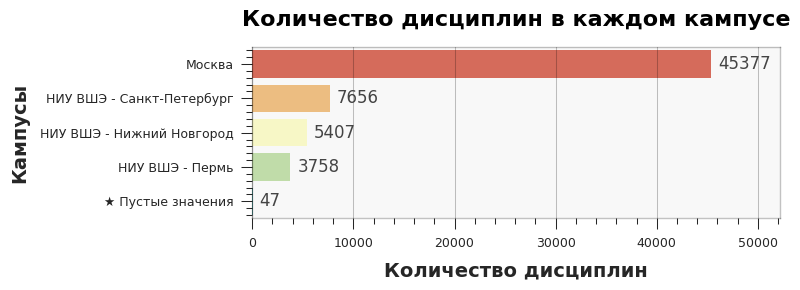

In [8]:
# Определение нужного столбца
column = "Филиал"

# Подсчет количества пустых значений
missing_count = df[column].isnull().sum()

# Создание нового DataFrame для визуализации, включая пустые значения
value_counts = df[column].value_counts()
value_counts["★ Пустые значения"] = missing_count

# Создание нового DataFrame для визуализации и сортировки по убыванию
sorted_df = value_counts.reset_index()
sorted_df.columns = [column, "count"]
sorted_df = sorted_df.sort_values(by = "count", ascending = False)

# Визуализация
plt.figure(figsize = (8, 3))
ax = sns.barplot(y = column, x = "count", data = sorted_df, palette = "Spectral")

# Определение максимального значения для оси X и добавление буфера
max_value = sorted_df["count"].max()
buffer = max_value * 0.15

# Установка диапазона оси X
ax.set_xlim(0, max_value + buffer)

# Добавление числа справа от каждого столбца
for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = "left", va = "center", xytext = (5, 0), textcoords = "offset points", fontsize = 12, color = "#444")

# Настройка заголовка и подписей
plt.title("Количество дисциплин в каждом кампусе", fontsize = 16, fontweight = "bold")
plt.xlabel("Количество дисциплин", fontsize = 14, fontweight = "bold")
plt.ylabel("Кампусы", fontsize = 14, fontweight = "bold")

# Уменьшение отступов и улучшение размещения
plt.tight_layout()

# Добавление аннотации со средним значением
# mean_value = sorted_df["count"].mean()
# ax.axvline(mean_value, color = "#444", linestyle = "--", linewidth = 2)
# ax.annotate(f"Среднее: {mean_value:.2f}", xy = (mean_value, len(sorted_df[column]) - 0.6), 
#             xytext = (10, 0), textcoords = "offset points", color = "#444", fontsize = 12, fontweight = "bold", ha = "left")

# Отображение графика
plt.show()

#### Язык реализации

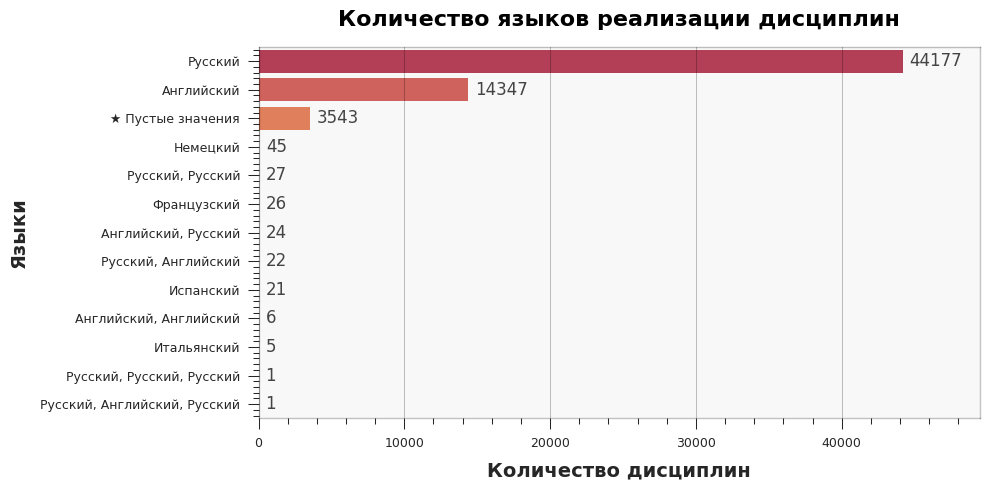

In [9]:
# Определение нужного столбца
column = "Язык реализации"

# Подсчет количества пустых значений
missing_count = df[column].isnull().sum()

# Создание нового DataFrame для визуализации, включая пустые значения
value_counts = df[column].value_counts()
value_counts["★ Пустые значения"] = missing_count

# Создание нового DataFrame для визуализации и сортировки по убыванию
sorted_df = value_counts.reset_index()
sorted_df.columns = [column, "count"]
sorted_df = sorted_df.sort_values(by = "count", ascending = False)

# Визуализация
plt.figure(figsize = (10, 5))
ax = sns.barplot(y = column, x = "count", data = sorted_df, palette = "Spectral")

# Определение максимального значения для оси X и добавление буфера
max_value = sorted_df["count"].max()
buffer = max_value * 0.12

# Установка диапазона оси X
ax.set_xlim(0, max_value + buffer)

# Добавление числа справа от каждого столбца
for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = "left", va = "center", xytext = (5, 0), textcoords = "offset points", fontsize = 12, color = "#444")

# Настройка заголовка и подписей
plt.title("Количество языков реализации дисциплин", fontsize = 16, fontweight = "bold")
plt.xlabel("Количество дисциплин", fontsize = 14, fontweight = "bold")
plt.ylabel("Языки", fontsize = 14, fontweight = "bold")

# Уменьшение отступов и улучшение размещения
plt.tight_layout()

# Добавление аннотации со средним значением
# mean_value = sorted_df["count"].mean()
# ax.axvline(mean_value, color = "#444", linestyle = "--", linewidth = 2)
# ax.annotate(f"Среднее: {mean_value:.2f}", xy = (mean_value, len(sorted_df[column]) - 0.6), 
#             xytext = (10, 0), textcoords = "offset points", color = "#444", fontsize = 12, fontweight = "bold", ha = "left")

# Отображение графика
plt.show()

#### Ограничения: Образовательные программы

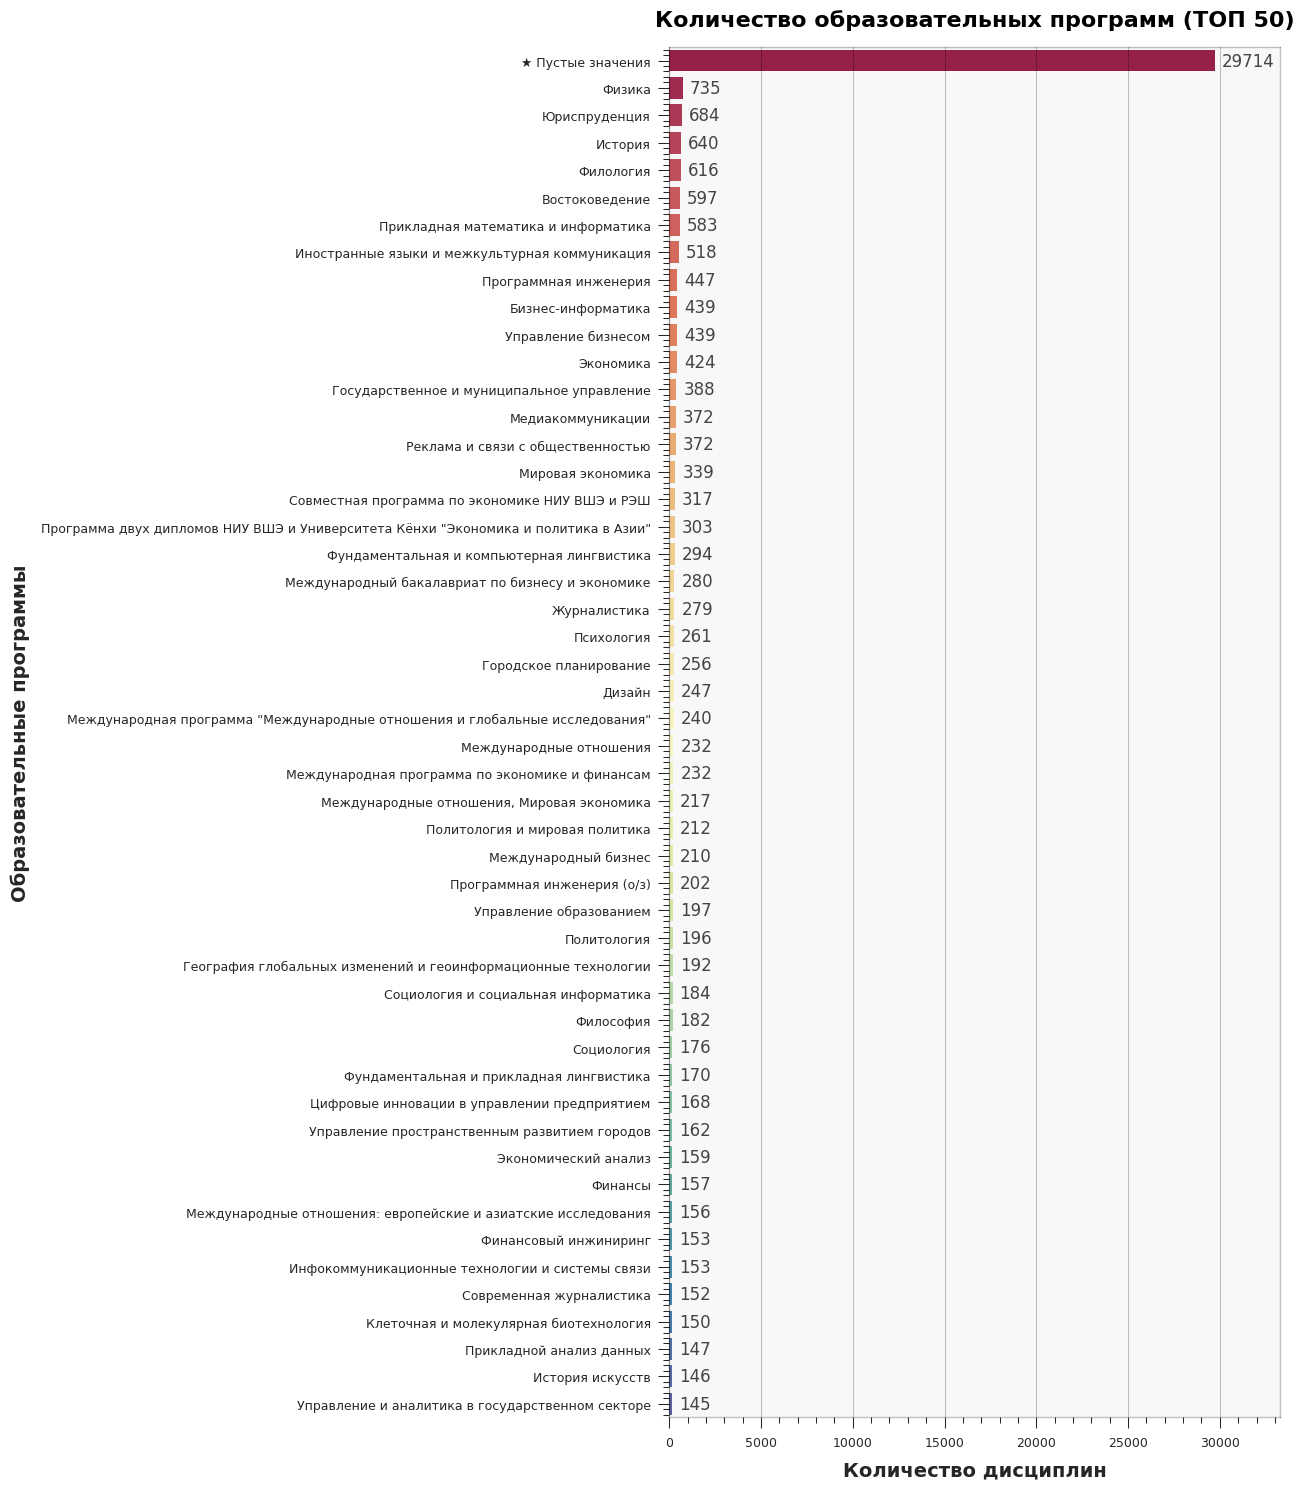

In [10]:
# Определение нужного столбца
column = "Ограничения: Образовательные программы"

# Подсчет количества пустых значений
missing_count = df[column].isnull().sum()

# Создание нового DataFrame для визуализации, включая пустые значения
value_counts = df[column].value_counts()
value_counts["★ Пустые значения"] = missing_count

# Создание новый DataFrame для визуализации и сортировки по убыванию
sorted_df = value_counts.reset_index()
sorted_df.columns = [column, "count"]
sorted_df = sorted_df.sort_values(by = "count", ascending = False)

# Фильтрация
top_cnt = 50
top_df = sorted_df.iloc[:top_cnt]

# Визуализация
plt.figure(figsize = (13, 15))
ax = sns.barplot(y = column, x = "count", data = top_df, palette = "Spectral")

# Определение максимального значения для оси X и добавление буфера
max_value = top_df["count"].max()
buffer = max_value * 0.12

# Установка диапазона оси X
ax.set_xlim(0, max_value + buffer)

# Добавление числа справа от каждого столбца
for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = "left", va = "center", xytext = (5, 0), textcoords = "offset points", fontsize = 12, color = "#444")

# Настройка заголовка и подписей
plt.title(f"Количество образовательных программ (ТОП {top_cnt})", fontsize = 16, fontweight = "bold")
plt.xlabel("Количество дисциплин", fontsize = 14, fontweight = "bold")
plt.ylabel("Образовательные программы", fontsize = 14, fontweight = "bold")

# Уменьшение отступов и улучшение размещения
plt.tight_layout()

# Добавление аннотации со средним значением
# mean_value = sorted_df["count"].mean()
# ax.axvline(mean_value, color = "#444", linestyle = "--", linewidth = 2)
# ax.annotate(f"Среднее: {mean_value:.2f}", xy = (mean_value, len(sorted_df[column]) - 0.6), 
#             xytext = (10, 0), textcoords = "offset points", color = "#444", fontsize = 12, fontweight = "bold", ha = "left")

# Отображение графика
plt.show()

#### Ограничения: Вид учебного плана

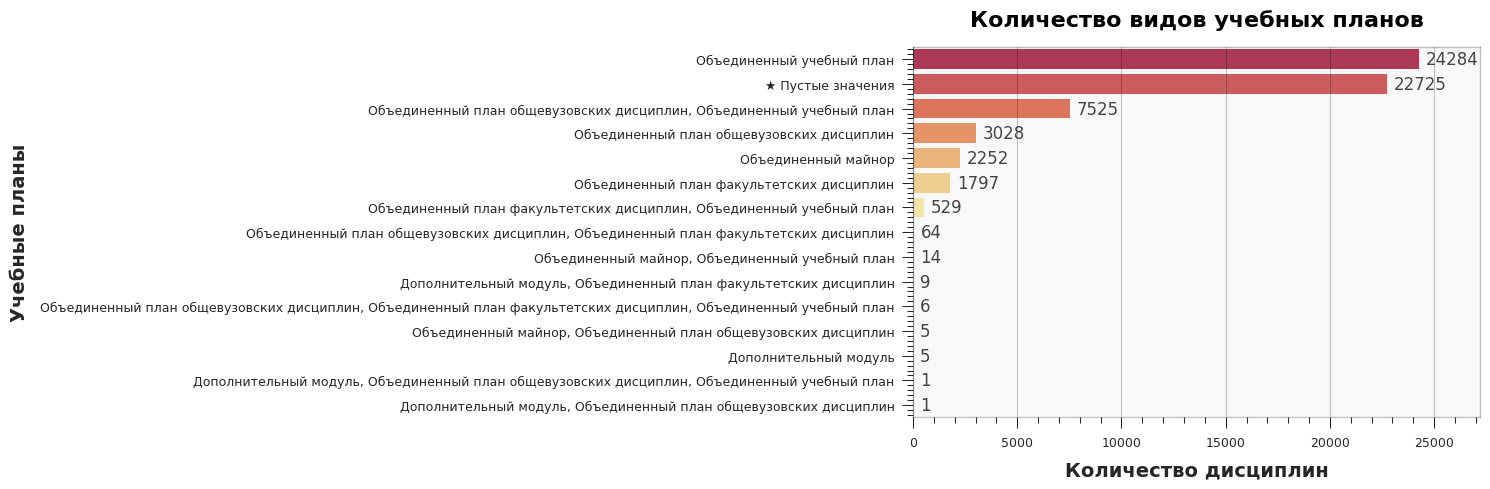

In [11]:
# Определение нужного столбца
column = "Ограничения: Вид учебного плана"

# Подсчет количества пустых значений
missing_count = df[column].isnull().sum()

# Создание нового DataFrame для визуализации, включая пустые значения
value_counts = df[column].value_counts()
value_counts["★ Пустые значения"] = missing_count

# Создание нового DataFrame для визуализации и сортировки по убыванию
sorted_df = value_counts.reset_index()
sorted_df.columns = [column, "count"]
sorted_df = sorted_df.sort_values(by = "count", ascending = False)

# Визуализация
plt.figure(figsize = (15, 5))
ax = sns.barplot(y = column, x = "count", data = sorted_df, palette = "Spectral")

# Определение максимального значения для оси X и добавление буфера
max_value = sorted_df["count"].max()
buffer = max_value * 0.12

# Установка диапазона оси X
ax.set_xlim(0, max_value + buffer)

# Добавление числа справа от каждого столбца
for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = "left", va = "center", xytext = (5, 0), textcoords = "offset points", fontsize = 12, color = "#444")

# Настройка заголовка и подписей
plt.title("Количество видов учебных планов", fontsize = 16, fontweight = "bold")
plt.xlabel("Количество дисциплин", fontsize = 14, fontweight = "bold")
plt.ylabel("Учебные планы", fontsize = 14, fontweight = "bold")

# Уменьшение отступов и улучшение размещения
plt.tight_layout()

# Добавление аннотации со средним значением
# mean_value = sorted_df["count"].mean()
# ax.axvline(mean_value, color = "#444", linestyle = "--", linewidth = 2)
# ax.annotate(f"Среднее: {mean_value:.2f}", xy = (mean_value, len(sorted_df[column]) - 0.6), 
#             xytext = (10, 0), textcoords = "offset points", color = "#444", fontsize = 12, fontweight = "bold", ha = "left")

# Отображение графика
plt.show()

#### Ограничения: Тип общевузовского плана

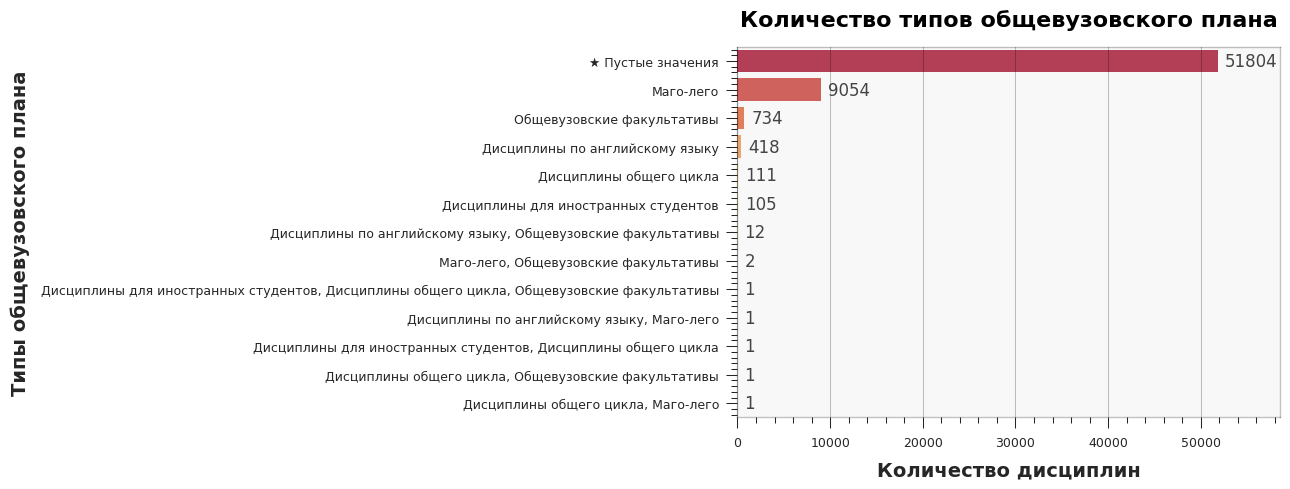

In [12]:
# Определение нужного столбца
column = "Ограничения: Тип общевузовского плана"

# Подсчет количества пустых значений
missing_count = df[column].isnull().sum()

# Создание нового DataFrame для визуализации, включая пустые значения
value_counts = df[column].value_counts()
value_counts["★ Пустые значения"] = missing_count

# Создание нового DataFrame для визуализации и сортировки по убыванию
sorted_df = value_counts.reset_index()
sorted_df.columns = [column, "count"]
sorted_df = sorted_df.sort_values(by = "count", ascending = False)

# Визуализация
plt.figure(figsize = (13, 5))
ax = sns.barplot(y = column, x = "count", data = sorted_df, palette = "Spectral")

# Определение максимального значения для оси X и добавление буфера
max_value = sorted_df["count"].max()
buffer = max_value * 0.13

# Установка диапазона оси X
ax.set_xlim(0, max_value + buffer)

# Добавление числа справа от каждого столбца
for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = "left", va = "center", xytext = (5, 0), textcoords = "offset points", fontsize = 12, color = "#444")

# Настройка заголовка и подписей
plt.title("Количество типов общевузовского плана", fontsize = 16, fontweight = "bold")
plt.xlabel("Количество дисциплин", fontsize = 14, fontweight = "bold")
plt.ylabel("Типы общевузовского плана", fontsize = 14, fontweight = "bold")

# Уменьшение отступов и улучшение размещения
plt.tight_layout()

# Добавление аннотации со средним значением
# mean_value = sorted_df["count"].mean()
# ax.axvline(mean_value, color = "#444", linestyle = "--", linewidth = 2)
# ax.annotate(f"Среднее: {mean_value:.2f}", xy = (mean_value, len(sorted_df[column]) - 0.6), 
#             xytext = (10, 0), textcoords = "offset points", color = "#444", fontsize = 12, fontweight = "bold", ha = "left")

# Отображение графика
plt.show()

#### Ограничения: Уровень образования

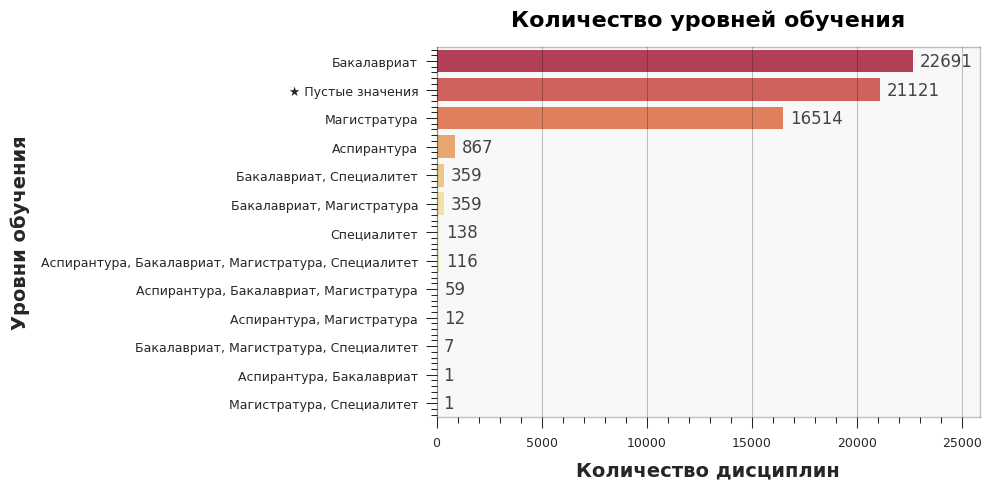

In [13]:
# Определение нужного столбца
column = "Ограничения: Уровень образования"

# Подсчет количества пустых значений
missing_count = df[column].isnull().sum()

# Создание нового DataFrame для визуализации, включая пустые значения
value_counts = df[column].value_counts()
value_counts["★ Пустые значения"] = missing_count

# Создание нового DataFrame для визуализации и сортировки по убыванию
sorted_df = value_counts.reset_index()
sorted_df.columns = [column, "count"]
sorted_df = sorted_df.sort_values(by = "count", ascending = False)

# Визуализация
plt.figure(figsize = (10, 5))
ax = sns.barplot(y = column, x = "count", data = sorted_df, palette = "Spectral")

# Определение максимального значения для оси X и добавление буфера
max_value = sorted_df["count"].max()
buffer = max_value * 0.14

# Установка диапазона оси X
ax.set_xlim(0, max_value + buffer)

# Добавление числа справа от каждого столбца
for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = "left", va = "center", xytext = (5, 0), textcoords = "offset points", fontsize = 12, color = "#444")

# Настройка заголовка и подписей
plt.title("Количество уровней обучения", fontsize = 16, fontweight = "bold")
plt.xlabel("Количество дисциплин", fontsize = 14, fontweight = "bold")
plt.ylabel("Уровни обучения", fontsize = 14, fontweight = "bold")

# Уменьшение отступов и улучшение размещения
plt.tight_layout()

# Добавление аннотации со средним значением
# mean_value = sorted_df["count"].mean()
# ax.axvline(mean_value, color = "#444", linestyle = "--", linewidth = 2)
# ax.annotate(f"Среднее: {mean_value:.2f}", xy = (mean_value, len(sorted_df[column]) - 0.6), 
#             xytext = (10, 0), textcoords = "offset points", color = "#444", fontsize = 12, fontweight = "bold", ha = "left")

# Отображение графика
plt.show()

#### Ограничения: Курс студентов

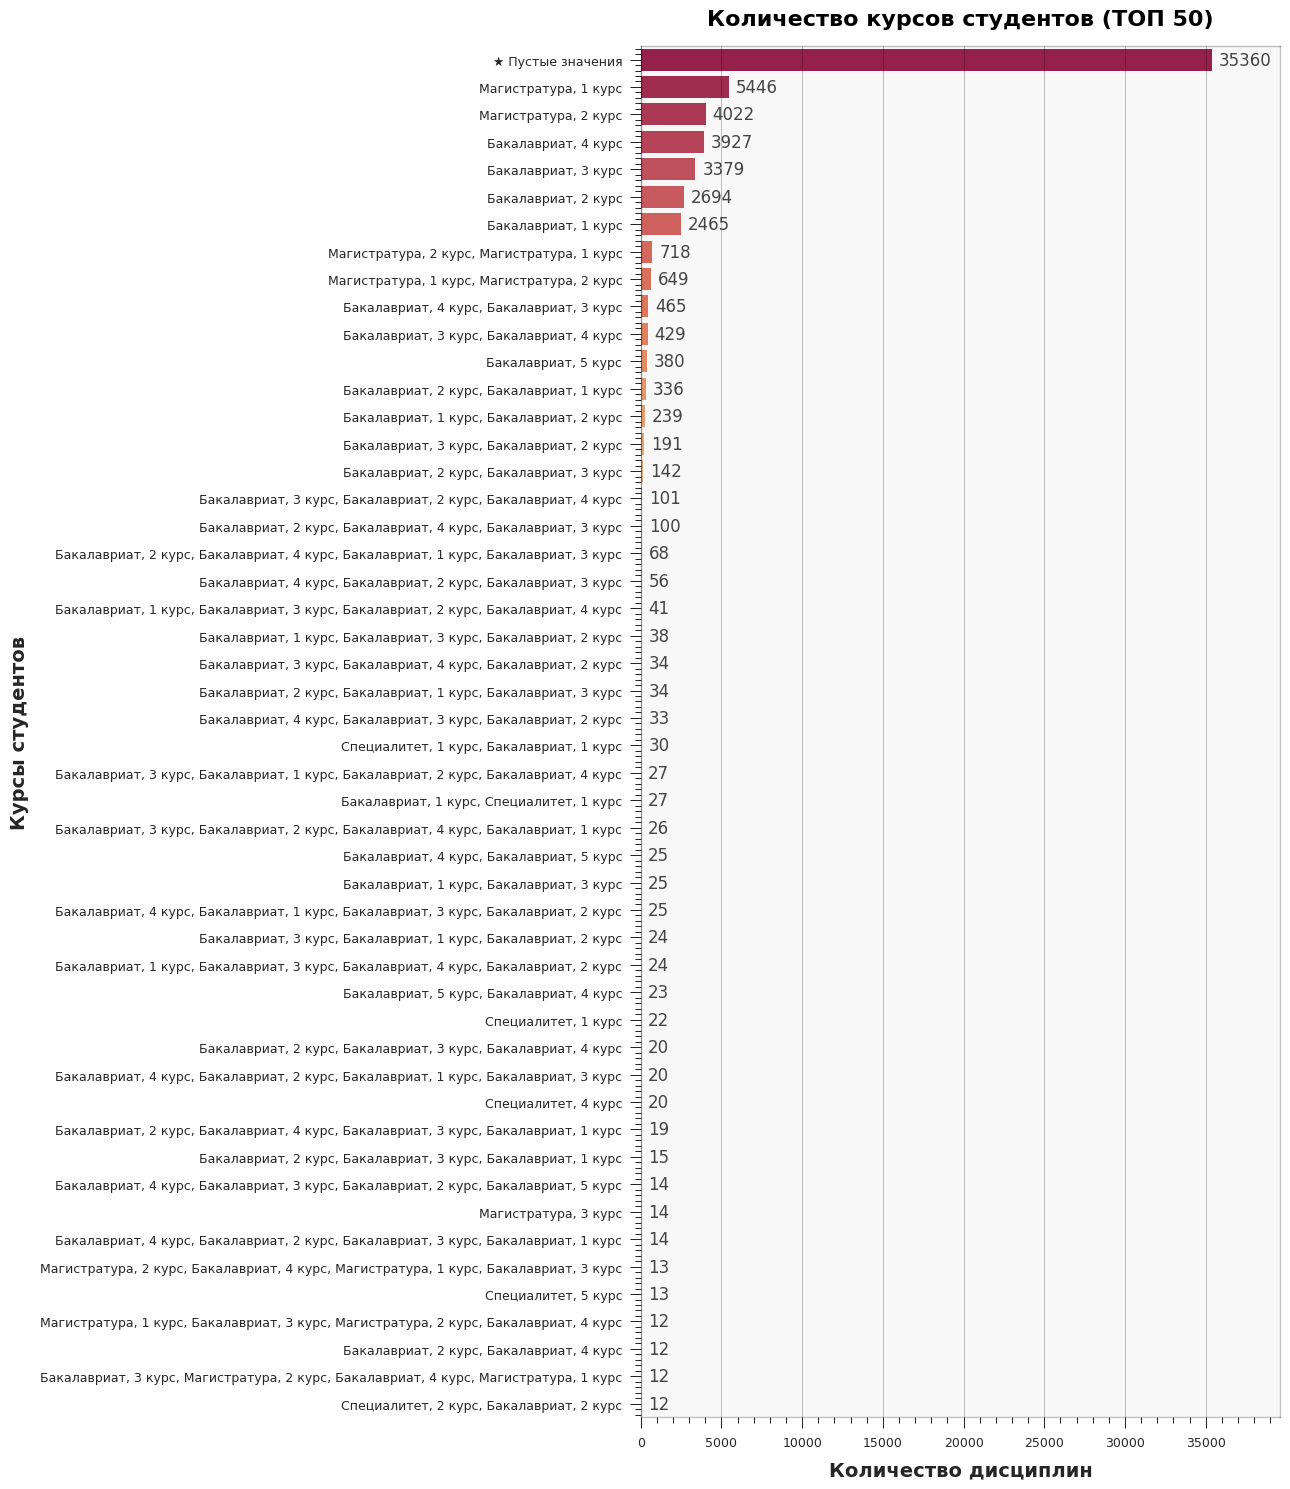

In [14]:
# Определение нужного столбца
column = "Ограничения: Курс студентов"

# Подсчет количества пустых значений
missing_count = df[column].isnull().sum()

# Создание нового DataFrame для визуализации, включая пустые значения
value_counts = df[column].value_counts()
value_counts["★ Пустые значения"] = missing_count

# Создание нового DataFrame для визуализации и сортировки по убыванию
sorted_df = value_counts.reset_index()
sorted_df.columns = [column, "count"]
sorted_df = sorted_df.sort_values(by = "count", ascending = False)

# Фильтрация
top_cnt = 50
top_df = sorted_df.iloc[:top_cnt]

# Визуализация
plt.figure(figsize = (13, 15))
ax = sns.barplot(y = column, x = "count", data = top_df, palette = "Spectral")

# Определение максимального значения для оси X и добавление буфера
max_value = top_df["count"].max()
buffer = max_value * 0.12

# Установка диапазона оси X
ax.set_xlim(0, max_value + buffer)

# Добавление числа справа от каждого столбца
for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = "left", va = "center", xytext = (5, 0), textcoords = "offset points", fontsize = 12, color = "#444")

# Настройка заголовка и подписей
plt.title(f"Количество курсов студентов (ТОП {top_cnt})", fontsize = 16, fontweight = "bold")
plt.xlabel("Количество дисциплин", fontsize = 14, fontweight = "bold")
plt.ylabel("Курсы студентов", fontsize = 14, fontweight = "bold")

# Уменьшение отступов и улучшение размещения
plt.tight_layout()

# Добавление аннотации со средним значением
# mean_value = sorted_df["count"].mean()
# ax.axvline(mean_value, color = "#444", linestyle = "--", linewidth = 2)
# ax.annotate(f"Среднее: {mean_value:.2f}", xy = (mean_value, len(sorted_df[column]) - 0.6), 
#             xytext = (10, 0), textcoords = "offset points", color = "#444", fontsize = 12, fontweight = "bold", ha = "left")

# Отображение графика
plt.show()

#### Ограничения: Вид майноров

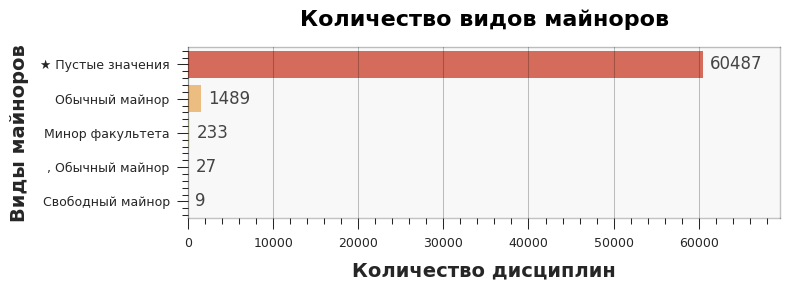

In [15]:
# Определение нужного столбца
column = "Ограничения: Вид майноров"

# Подсчет количества пустых значений
missing_count = df[column].isnull().sum()

# Создание нового DataFrame для визуализации, включая пустые значения
value_counts = df[column].value_counts()
value_counts["★ Пустые значения"] = missing_count

# Создание нового DataFrame для визуализации и сортировки по убыванию
sorted_df = value_counts.reset_index()
sorted_df.columns = [column, "count"]
sorted_df = sorted_df.sort_values(by = "count", ascending = False)

# Визуализация
plt.figure(figsize = (8, 3))
ax = sns.barplot(y = column, x = "count", data = sorted_df, palette = "Spectral")

# Определение максимального значения для оси X и добавление буфера
max_value = sorted_df["count"].max()
buffer = max_value * 0.15

# Установка диапазона оси X
ax.set_xlim(0, max_value + buffer)

# Добавление числа справа от каждого столбца
for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = "left", va = "center", xytext = (5, 0), textcoords = "offset points", fontsize = 12, color = "#444")

# Настройка заголовка и подписей
plt.title("Количество видов майноров", fontsize = 16, fontweight = "bold")
plt.xlabel("Количество дисциплин", fontsize = 14, fontweight = "bold")
plt.ylabel("Виды майноров", fontsize = 14, fontweight = "bold")

# Уменьшение отступов и улучшение размещения
plt.tight_layout()

# Добавление аннотации со средним значением
# mean_value = sorted_df["count"].mean()
# ax.axvline(mean_value, color = "#444", linestyle = "--", linewidth = 2)
# ax.annotate(f"Среднее: {mean_value:.2f}", xy = (mean_value, len(sorted_df[column]) - 0.6), 
#             xytext = (10, 0), textcoords = "offset points", color = "#444", fontsize = 12, fontweight = "bold", ha = "left")

# Отображение графика
plt.show()